In [49]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier

## Preprocessing data

In [50]:
df = pd.read_csv('tested.csv')
print(df.shape)
df.head()

(418, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


### Checking and filling null values

In [52]:
df.isnull().sum() / df.shape[0]

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.782297
Embarked       0.000000
dtype: float64

In [53]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [54]:
df.drop(columns=['Cabin'], inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [55]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 36.1+ KB


In [56]:
df.dropna(inplace=True)

In [57]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000
mean,1100.635492,0.364508,2.263789,30.200103,0.448441,0.393285,35.627188
std,120.923774,0.481870,0.842077,12.562386,0.897568,0.982419,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.000000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1101.000000,0.000000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1205.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### Dropping unnecessary columns

In [58]:
df.drop(columns=['Name', 'Ticket', 'Embarked', 'PassengerId'], inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,34.5,0,0,7.8292
1,1,3,female,47.0,1,0,7.0000
2,0,2,male,62.0,0,0,9.6875
3,0,3,male,27.0,0,0,8.6625
4,1,3,female,22.0,1,1,12.2875


### Encoding
Since it's just a single categorical feature, we're doing it manually

In [59]:
df['Sex'] = df['Sex'].apply(lambda x: 1 if x == 'male' else 0)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,34.5,0,0,7.8292
1,1,3,0,47.0,1,0,7.0000
2,0,2,1,62.0,0,0,9.6875
3,0,3,1,27.0,0,0,8.6625
4,1,3,0,22.0,1,1,12.2875


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  417 non-null    int64  
 1   Pclass    417 non-null    int64  
 2   Sex       417 non-null    int64  
 3   Age       417 non-null    float64
 4   SibSp     417 non-null    int64  
 5   Parch     417 non-null    int64  
 6   Fare      417 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 26.1 KB


### Dropping duplicates

In [61]:
df.duplicated().sum()

40

In [62]:
df.drop_duplicates(inplace=True)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 377 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  377 non-null    int64  
 1   Pclass    377 non-null    int64  
 2   Sex       377 non-null    int64  
 3   Age       377 non-null    float64
 4   SibSp     377 non-null    int64  
 5   Parch     377 non-null    int64  
 6   Fare      377 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 23.6 KB


In [64]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [65]:
X = df.drop(columns=['Survived'])
y = df['Survived']

X.shape, y.shape

((377, 6), (377,))

### Scaling

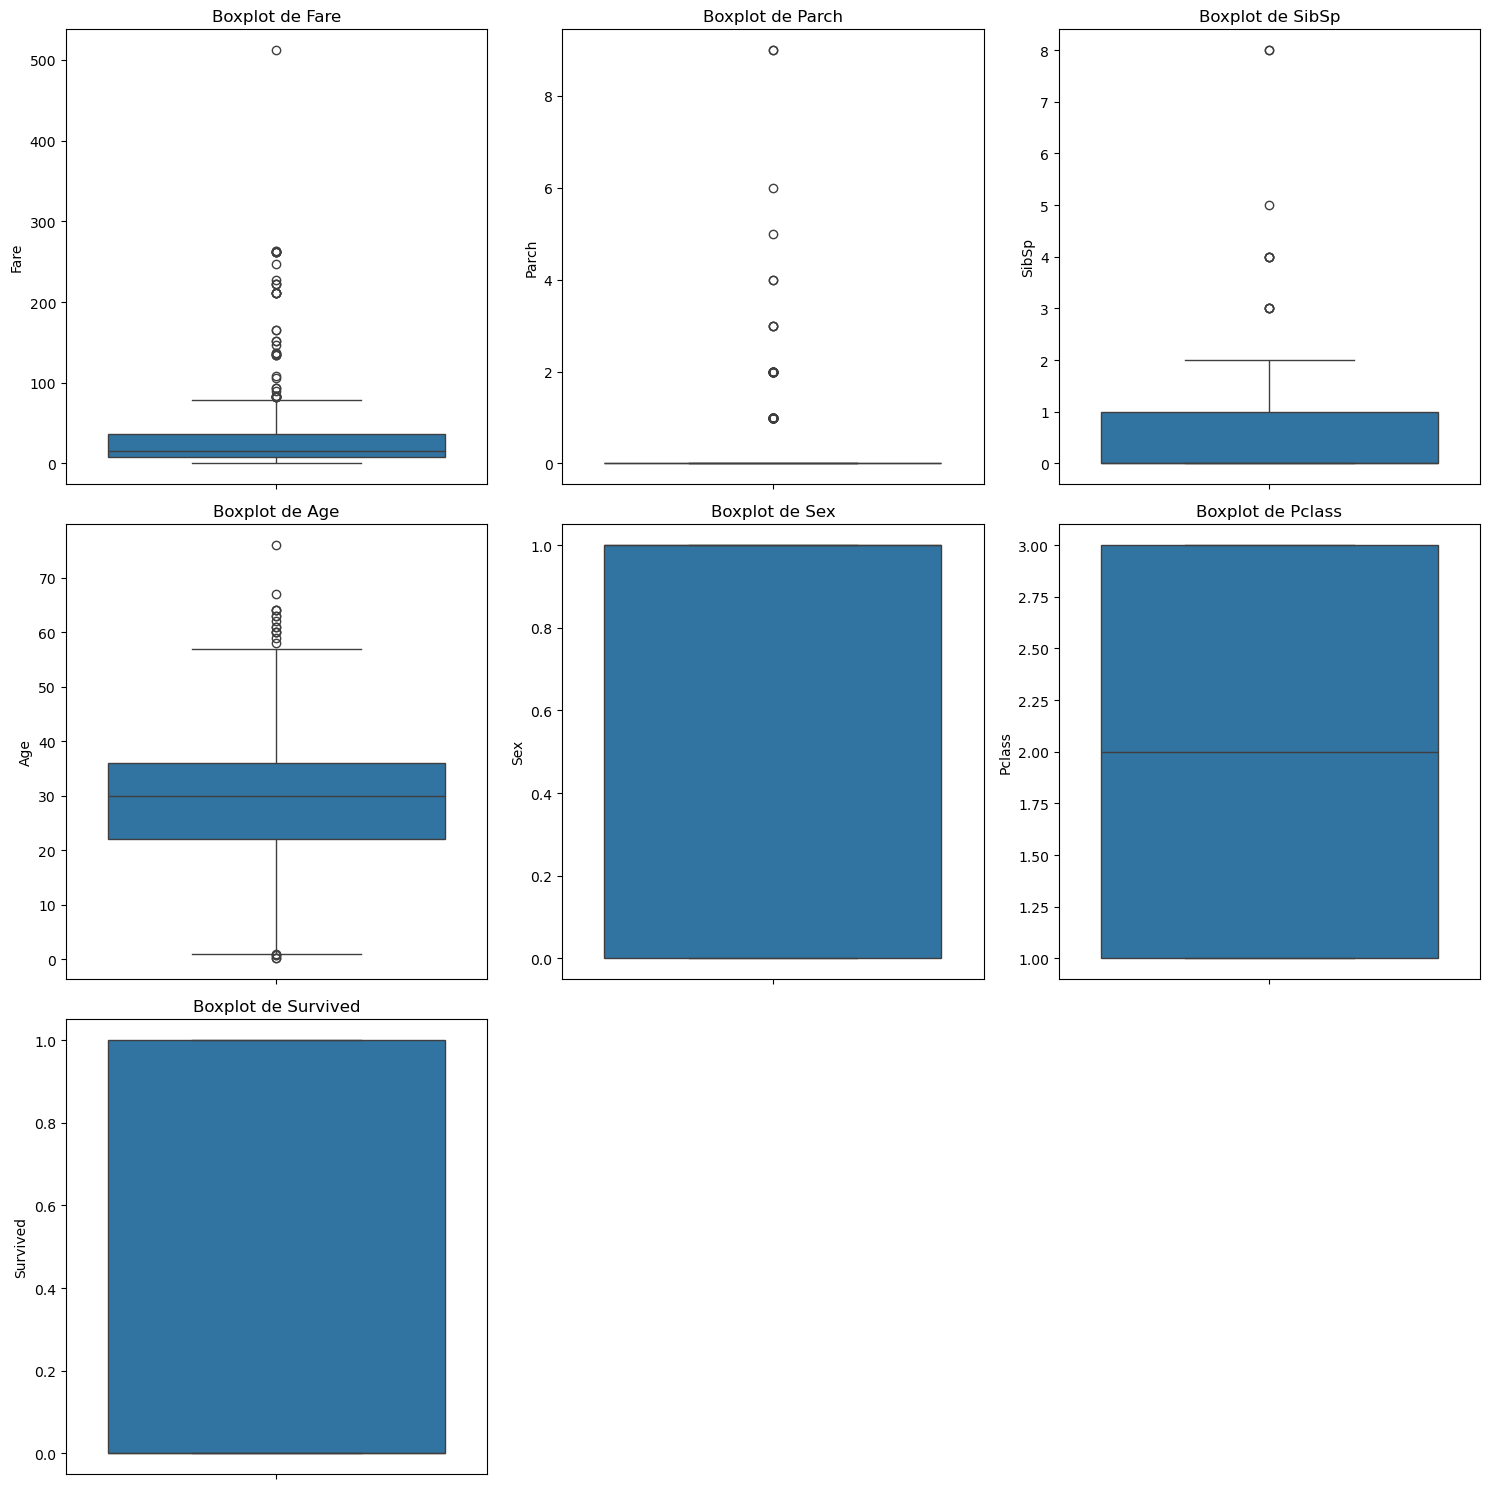

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
def create_boxplots(df, columns=None):
    if columns is None:
        columns = df.select_dtypes(include=['number']).columns
    num_cols = len(columns)
    num_rows = (num_cols + 2) // 3
    plt.figure(figsize=(15, 5 * num_rows))
    for i, col in enumerate(reversed(columns)):
        plt.subplot(num_rows, 3, i + 1)
        sns.boxplot(y=df[col])
        plt.title(f'Boxplot de {col}')
        plt.ylabel(col)
    plt.tight_layout()
    plt.show()
    
create_boxplots(df)

In [67]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import classification_report

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

import pickle
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((301, 6), (76, 6), (301,), (76,))

## 1. Aplique por lo menos dos métodos de clasificación a los datos, utilice como variable target la columna Survived.

### Random Forest Classifier

In [21]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       1.00      1.00      1.00        27

    accuracy                           1.00        76
   macro avg       1.00      1.00      1.00        76
weighted avg       1.00      1.00      1.00        76



Random forest tiene muy buena capacidad para discernir entre los que sobrevivieron, alcanzando un 100% de precisión.

In [72]:
with open('rf.pkl', 'wb') as f:
    pickle.dump(rf, f)

In [22]:
importancia_predictores = pd.DataFrame({'predictor': df.drop(columns=['Survived']).columns, 'importancia': rf.feature_importances_})
importancia_predictores.sort_values('importancia', ascending=True).T

,0,3,4,2,5,1
predictor,Pclass,SibSp,Parch,Age,Fare,Sex
importancia,0.007182,0.009198,0.015468,0.029413,0.056417,0.882321


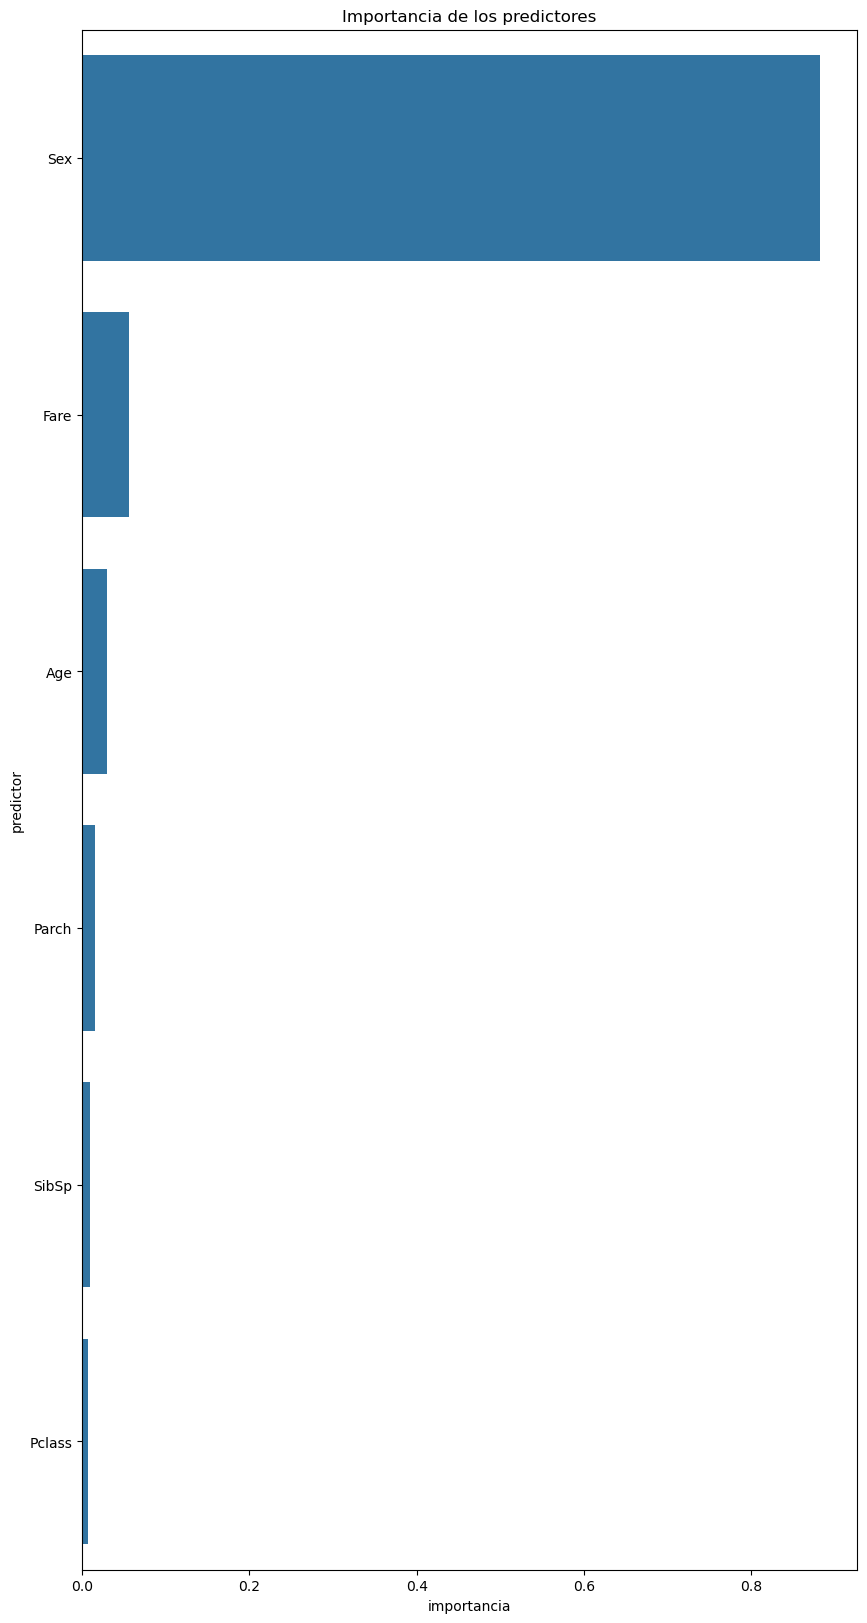

In [ ]:
plt.figure(figsize=(10, 20))
sns.barplot(x='importancia', y='predictor', data=importancia_predictores.sort_values('importancia', ascending=False))
plt.title('Importancia de los predictores')
plt.show()

Sorprendentemente, el sexo del pasajero es la variable más determinante al momento de identificar a los sobrevivientes.

### SVC

In [24]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        49
           1       1.00      0.93      0.96        27

    accuracy                           0.97        76
   macro avg       0.98      0.96      0.97        76
weighted avg       0.97      0.97      0.97        76



Por otro lado, SVC alcanza 97%, el cual es un muy buen resultado, pero que no alcanza a RF.

## 2. Utilice la librería sklearn-genetic-opt y/o optuna para la optimización de hiperparametros, compare los resultados de los modelos.

Como no se puede mejorar el resultado obtenido con random forest, se realizará la optimización de hiperparámetros con optuna y sklearn-genetic-opt con la finalidad de compararlos

### Optuna

In [25]:
import optuna

In [26]:
def objective(trial):
    C = trial.suggest_loguniform('C', 1e-3, 1e3)
    kernel = trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid'])
    degree = trial.suggest_int('degree', 2, 5) if kernel == 'poly' else 3
    gamma = trial.suggest_categorical('gamma', ['scale', 'auto'])

    svc = SVC(C=C, kernel=kernel, degree=degree, gamma=gamma)

    scores = cross_val_score(svc, X_train, y_train, cv=5, scoring='accuracy')
    return scores.mean()

In [27]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

[I 2024-11-26 15:51:15,969] A new study created in memory with name: no-name-c9612870-290d-467c-9811-0b45fba2a28e
C:\Users\andre\AppData\Local\Temp\ipykernel_20560\1492138669.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-3, 1e3)
[I 2024-11-26 15:51:15,988] Trial 0 finished with value: 1.0 and parameters: {'C': 378.3465915170994, 'kernel': 'poly', 'degree': 3, 'gamma': 'scale'}. Best is trial 0 with value: 1.0.
C:\Users\andre\AppData\Local\Temp\ipykernel_20560\1492138669.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-3, 1e3)
[I 2024-11-26 15:51:16,018] Trial 1 finished with value: 0.9767

In [28]:
print("Best parameters:", study.best_params)
print("Best accuracy:", study.best_value)

Best parameters: {'C': 378.3465915170994, 'kernel': 'poly', 'degree': 3, 'gamma': 'scale'}
Best accuracy: 1.0


In [29]:
best_params = study.best_params
svc_optimized = SVC(
    C=best_params['C'],
    kernel=best_params['kernel'],
    degree=best_params.get('degree', 3),
    gamma=best_params['gamma']
)
svc_optimized.fit(X_train, y_train)

y_pred = svc_optimized.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       1.00      1.00      1.00        27

    accuracy                           1.00        76
   macro avg       1.00      1.00      1.00        76
weighted avg       1.00      1.00      1.00        76



In [73]:
with open('svc_optuna.pkl', 'wb') as f:
    pickle.dump(svc_optimized, f)

### Sklearn-genetic-opt

In [ ]:
from deap import base, creator, tools, algorithms
import random
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

In [ ]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

def create_individual():
    C = random.uniform(0.1, 1000)
    gamma = random.uniform(1e-5, 1)
    return [C, gamma]

def evaluate(individual):
    C, gamma = individual
    
    if gamma <= 0:
        gamma = 1e-5
    
    clf = SVC(C=C, gamma=gamma)
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    
    return (accuracy,)

c:\Users\andre\miniconda3\envs\dm-env\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
c:\Users\andre\miniconda3\envs\dm-env\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [41]:
toolbox = base.Toolbox()
toolbox.register("individual", tools.initIterate, creator.Individual, create_individual)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evaluate)

In [ ]:
population_size = 50
generations = 30
cx_prob = 0.7
mut_prob = 0.2

population = toolbox.population(n=population_size)

algorithms.eaSimple(population, toolbox, cxpb=cx_prob, mutpb=mut_prob, 
                    ngen=generations, verbose=True)

gen	nevals
0  	50    
1  	39    
2  	41    
3  	38    
4  	42    
5  	33    
6  	41    
7  	44    
8  	41    
9  	40    
10 	43    
11 	33    
12 	43    
13 	43    
14 	39    
15 	41    
16 	36    
17 	39    
18 	44    
19 	40    
20 	40    
21 	42    
22 	37    
23 	40    
24 	37    
25 	31    
26 	35    
27 	28    
28 	40    
29 	36    
30 	38    


([[110.72738726179404, -1.8102789313432486],
  [809.5216373420415, 0.02542305543186659],
  [808.873626219663, 0.02542305543186659],
  [810.493262794097, 0.02542305543186659],
  [808.7022586262136, 0.02542305543186659],
  [808.7347407050627, 0.02542305543186659],
  [110.72738726179404, 0.02542305543186659],
  [110.72738726179404, 0.02542305543186659],
  [808.873626219663, 0.02542305543186659],
  [808.8906127691678, 0.02542305543186659],
  [808.7022586262136, 0.02542305543186659],
  [809.906274143122, 0.02542305543186659],
  [110.72738726179404, 0.02542305543186659],
  [808.7022586262136, 0.02542305543186659],
  [110.72738726179404, 0.02542305543186659],
  [809.5216373420415, 0.02542305543186659],
  [110.72738726179404, 0.02542305543186659],
  [110.72738726179404, 0.02542305543186659],
  [808.7347407050627, 0.02542305543186659],
  [808.873626219663, 0.02542305543186659],
  [808.873626219663, 0.02542305543186659],
  [809.5216373420415, 0.4917524782471723],
  [808.873626219663, 0.025423055

In [43]:
best_individual = tools.selBest(population, 1)[0]
print(f"Best individual: {best_individual}")

Best individual: [110.72738726179404, -1.8102789313432486]


In [ ]:
C, gamma = best_individual

if gamma <= 0:
	gamma = 1e-5

final_clf = SVC(C=C, gamma=gamma)
final_clf.fit(X_train, y_train)
final_accuracy = accuracy_score(y_test, final_clf.predict(X_test))
print(f"Final accuracy with best hyperparameters: {final_accuracy}")

Final accuracy with best hyperparameters: 1.0


In [71]:
with open('svc_genetic.pkl', 'wb') as f:
    pickle.dump(final_clf, f)

**Interpretación:** En este caso, random forest obtiene mejores resultados sin necesidad de optimizar los hiperparámetros, ya que este modelo no hace suposiciones sobre la linealidad de los datos. SVC, de manera contraria, asume esta linealidad; no obstante, la diferencia de rendimiento sirvió para demostrar que las técnicas avanzadas de optimización de hiperparámetros son efectivas, logrando igualar el rendimiento de rf.